In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.iloc[0:5]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [8]:
print(netflix_df.iloc[0:5])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

# Filtering for movies!
Okay, we have our data! Now we can dive in and start looking at movie lengths.

Looking at the first five rows of our new DataFrame, we notice a column type. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the duration column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?

Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where type is Movie. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration

In [12]:
netflix_df_movies_only = netflix_df.loc[netflix_df['type'] == 'Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]

In [13]:
print(netflix_movies_col_subset.iloc[0:5])

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


# Creating a scatter plot
Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.

This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis

<function matplotlib.pyplot.show(close=None, block=None)>

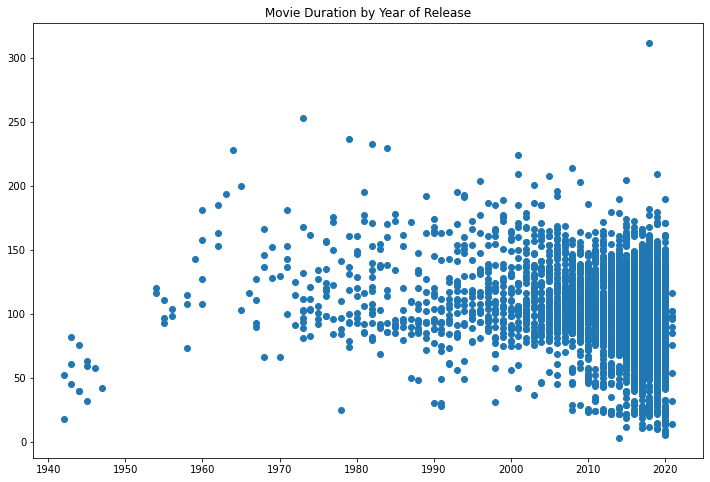

In [18]:
import matplotlib.pyplot as plt
# Fig method is used to increase the size of the plot
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])
plt.title("Movie Duration by Year of Release")a
plt.show

# Digging deeper
This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [30]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]
print(short_movies.iloc[0:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

# Marking non-feature films
Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the genre column.

In [26]:
colors = []

for genre, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')
        
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


# Plotting with color!¶
Lovely looping! We now have a colors list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

<function matplotlib.pyplot.show(close=None, block=None)>

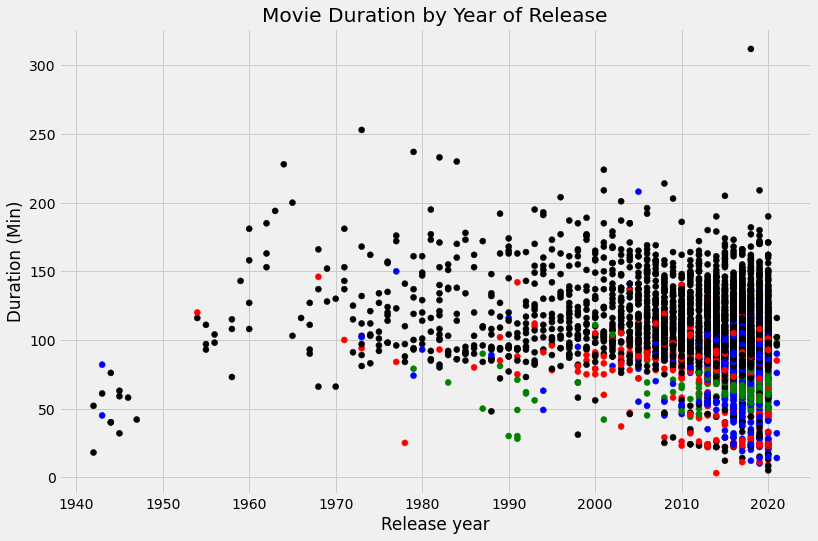

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], c=colors)
plt.title("Movie Duration by Year of Release")
plt.xlabel('Release year')
plt.ylabel('Duration (Min)')
plt.show

# MY DEDUCTION!
Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses

In [32]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = 'No'